In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow.keras.utils as utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [134]:
# 1. 데이터 셋
df_wine = pd.read_csv('data/winequality-red.csv', sep=';')
# na값 없음
input_data = df_wine.iloc[:,:-1].values
target = df_wine.iloc[:,11]
# scale 조절
scale_input = MinMaxScaler()
scale_input.fit(input_data)
scaled_input = scale_input.transform(input_data)
# target 데이터 원 핫 인코딩
ttarget = pd.get_dummies(target).to_numpy()
# 0에서 시작하게 아니라면 utils.to_categorical보단 효율이 좋다ategorical보단 효율이 좋다
# 학습 데이터 : 테스트 데이터 7:3
X_train,X_test,Y_train,Y_test = train_test_split(scaled_input,ttarget,test_size=0.3,random_state=1)
# 학습 데이터 : 검증 데이터 8:2 
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=2)

In [135]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,X_val.shape,Y_val.shape

((895, 11), (895, 6), (480, 11), (480, 6), (224, 11), (224, 6))

In [136]:
# 2. 모델 구성
model = Sequential()
# layer 구성
model.add(Dense(1024,input_dim=11,activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))

# 3. 모델 학습 과정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 4. 학습
hist = model.fit(X_train,Y_train,epochs=200,batch_size=20,validation_data=(X_val,Y_val),verbose=2)


Epoch 1/200
45/45 - 1s - loss: 1.3883 - accuracy: 0.4011 - val_loss: 1.1731 - val_accuracy: 0.5982
Epoch 2/200
45/45 - 0s - loss: 1.2226 - accuracy: 0.4335 - val_loss: 1.0846 - val_accuracy: 0.5804
Epoch 3/200
45/45 - 0s - loss: 1.1766 - accuracy: 0.4771 - val_loss: 1.0406 - val_accuracy: 0.5759
Epoch 4/200
45/45 - 0s - loss: 1.1473 - accuracy: 0.4872 - val_loss: 1.0330 - val_accuracy: 0.5714
Epoch 5/200
45/45 - 0s - loss: 1.1131 - accuracy: 0.5073 - val_loss: 0.9787 - val_accuracy: 0.5580
Epoch 6/200
45/45 - 0s - loss: 1.0994 - accuracy: 0.5151 - val_loss: 0.9632 - val_accuracy: 0.5580
Epoch 7/200
45/45 - 0s - loss: 1.0767 - accuracy: 0.5430 - val_loss: 0.9467 - val_accuracy: 0.5759
Epoch 8/200
45/45 - 0s - loss: 1.0782 - accuracy: 0.5330 - val_loss: 0.9697 - val_accuracy: 0.5536
Epoch 9/200
45/45 - 0s - loss: 1.0591 - accuracy: 0.5475 - val_loss: 0.9344 - val_accuracy: 0.5848
Epoch 10/200
45/45 - 0s - loss: 1.0532 - accuracy: 0.5598 - val_loss: 0.9324 - val_accuracy: 0.5759
Epoch 11/

45/45 - 0s - loss: 0.9456 - accuracy: 0.6022 - val_loss: 0.9037 - val_accuracy: 0.6161
Epoch 84/200
45/45 - 0s - loss: 0.9539 - accuracy: 0.5832 - val_loss: 0.8927 - val_accuracy: 0.6205
Epoch 85/200
45/45 - 0s - loss: 0.9456 - accuracy: 0.6034 - val_loss: 0.8927 - val_accuracy: 0.6205
Epoch 86/200
45/45 - 0s - loss: 0.9544 - accuracy: 0.5788 - val_loss: 0.8922 - val_accuracy: 0.6205
Epoch 87/200
45/45 - 0s - loss: 0.9458 - accuracy: 0.5933 - val_loss: 0.8945 - val_accuracy: 0.6339
Epoch 88/200
45/45 - 0s - loss: 0.9554 - accuracy: 0.5911 - val_loss: 0.9188 - val_accuracy: 0.6250
Epoch 89/200
45/45 - 0s - loss: 0.9491 - accuracy: 0.5765 - val_loss: 0.9157 - val_accuracy: 0.6295
Epoch 90/200
45/45 - 0s - loss: 0.9567 - accuracy: 0.5866 - val_loss: 0.8970 - val_accuracy: 0.6295
Epoch 91/200
45/45 - 0s - loss: 0.9512 - accuracy: 0.6034 - val_loss: 0.8942 - val_accuracy: 0.6205
Epoch 92/200
45/45 - 0s - loss: 0.9441 - accuracy: 0.5810 - val_loss: 0.9130 - val_accuracy: 0.6295
Epoch 93/200


Epoch 165/200
45/45 - 0s - loss: 0.9344 - accuracy: 0.6000 - val_loss: 0.8943 - val_accuracy: 0.6250
Epoch 166/200
45/45 - 0s - loss: 0.9411 - accuracy: 0.5855 - val_loss: 0.9082 - val_accuracy: 0.6205
Epoch 167/200
45/45 - 0s - loss: 0.9428 - accuracy: 0.6034 - val_loss: 0.9021 - val_accuracy: 0.6339
Epoch 168/200
45/45 - 0s - loss: 0.9359 - accuracy: 0.5922 - val_loss: 0.9052 - val_accuracy: 0.6384
Epoch 169/200
45/45 - 0s - loss: 0.9519 - accuracy: 0.5899 - val_loss: 0.9165 - val_accuracy: 0.6295
Epoch 170/200
45/45 - 0s - loss: 0.9407 - accuracy: 0.5888 - val_loss: 0.9105 - val_accuracy: 0.6473
Epoch 171/200
45/45 - 0s - loss: 0.9405 - accuracy: 0.5888 - val_loss: 0.9112 - val_accuracy: 0.6295
Epoch 172/200
45/45 - 0s - loss: 0.9359 - accuracy: 0.5955 - val_loss: 0.9097 - val_accuracy: 0.6250
Epoch 173/200
45/45 - 0s - loss: 0.9346 - accuracy: 0.5966 - val_loss: 0.9095 - val_accuracy: 0.6250
Epoch 174/200
45/45 - 0s - loss: 0.9365 - accuracy: 0.6034 - val_loss: 0.8973 - val_accurac

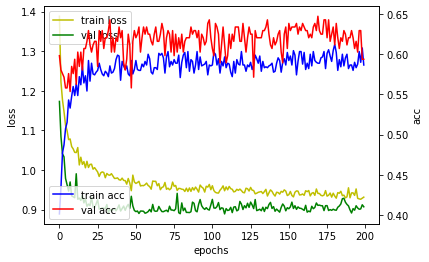

In [137]:
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [138]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=20)

24/24 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.5896


In [139]:
# 6. 평가 및 예측
score = model.evaluate(X_test,Y_test,verbose=0)
print('model loss : ', score[0])
print('model accuracy : ', score[1])

model loss :  0.9462454319000244
model accuracy :  0.5895833373069763


In [141]:
pred = np.argmax(model.predict(X_test),axis=1)+3
real = np.argmax(Y_test,axis=1)+3
ct = pd.crosstab(real,pred)
ct.index.name = 'real'
ct.columns.name = 'predict'
ct

predict,4,5,6,7
real,,,,
3,0,2,0,0
4,1,13,7,0
5,0,168,38,1
6,0,86,103,6
7,0,6,35,11
8,0,0,1,2
